# Tutorial session Week 4: Classification
**Lecturer: Dr Maria Deprez**

**Small tutorial groups:**
* **Lindsay:** BEng A-B, BEng C-F
* **Mariana:** BEng G-J, BEng K-L
* **Cher:** BEng M-N, BEng P-T
* **Maria:** BEng V-Z, MSc/MRes/MEng

## Program 
### 10:00-10:15 am: Introduction and Q&A
Given by the lecturer in the main channel **General**
### 10:15-11:45 am: Tutorial
In your small group tutorial channel with your TA/Lecturer
### 11:45 am-12 pm: Q&A
Return to the main channel for final remarks and Q&A about the tutorial

**Note:** 
* **solution to exercise 1 available as video on KEATS**
* **solutions to exercises 2-5 available as solved notebooks**

## Content
* **Exercise 1**: Univariate Binary Logistic Regression - part of the lecture
* **Exercise 2**: Multivariate (2D) Binary Logistic Regression: Compare classifiers
* **Exercise 3**: Multivariate (2D) Multilabel Logistic Regression: Balanced classification (activities mandatory, exercise optional)
* **Exercise 4**: Support Vector Classification
* **Exercise 5**: Explore Support Vector Classification (optional)

## Linear classification

* **Linear decision function** $y=\sum_kx_kw_k+b$

* **Decision function positive - label 1** 

* **Decision function negative - label -1 or 0**

### Decision function: 1D features

Dataframe columns:  Index(['EF', 'GLS', 'HF'], dtype='object')
Feature matrix X dimensions:  (120, 1)
Target vector y dimensions:  (120,)


Text(0.5, 1.0, 'Ground Truth Labels')

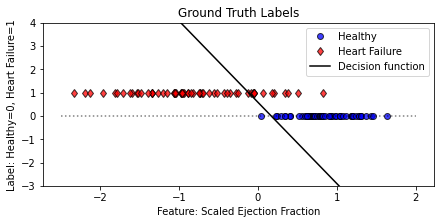

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Calculate cross-validated accuracy
def accuracyCV(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print('Mean cross-validated accuracy: ',round(scores.mean(),2))

# Plot data
def plotData(X,y,adjust_axis = True):
    plt.figure(figsize=(7,3))
    plt.plot(X[y==0], y[y==0], "bo", alpha=0.75, markeredgecolor='k', label = 'Healthy')
    plt.plot(X[y==1], y[y==1], "rd", alpha=0.75, markeredgecolor='k', label = 'Heart Failure')
    plt.plot(np.linspace(-2.5,2,100),np.zeros(100),'k:',alpha=0.5)

    plt.xlabel('Feature: Scaled Ejection Fraction')
    plt.ylabel('Label: Healthy=0, Heart Failure=1')
    plt.legend()
    
    if adjust_axis:
        plt.axis([-2.5,2,-0.1,1.1])
        
# Plot data
def plotDataPred(X,y,y_pred,adjust_axis = True):
    plt.figure(figsize=(7,3))
    plt.plot(X[y_pred==0], y[y_pred==0], "bo", alpha=0.75, markeredgecolor='k', label = 'Healthy')
    plt.plot(X[y_pred==1], y[y_pred==1], "rd", alpha=0.75, markeredgecolor='k', label = 'Heart Failure')
    plt.plot(np.linspace(-2.5,2,100),np.zeros(100),'k:',alpha=0.5)

    plt.xlabel('Feature: Scaled Ejection Fraction')
    plt.ylabel('Label: Healthy=0, Heart Failure=1')
    plt.legend()
    
    if adjust_axis:
        plt.axis([-2.5,2,-0.1,1.1])

#Load dataset
df = pd.read_csv('datasets/heart_failure_data.csv')
print('Dataframe columns: ', df.keys())
scaler = StandardScaler()
data = df.to_numpy()
X = scaler.fit_transform(data[:,0].reshape(-1,1)) # Ejection Fraction
print('Feature matrix X dimensions: ', X.shape)
y = data[:,2] # Heart Failure
print('Target vector y dimensions: ', y.shape)


# Select the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model
model.fit(X,y)

# Generate feature space
x = np.linspace(-2.5,2,100).reshape(-1,1)
# Predict decision function
df = model.decision_function(x)
# Plot data
plotData(X,y,adjust_axis=False)
# Plot decision function
plt.plot(x,df,'k', label = 'Decision function')
plt.ylim([-3,4])
plt.legend()
plt.title('Ground Truth Labels')

Text(0.5, 1.0, 'Predicted Labels')

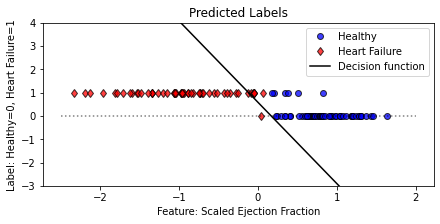

In [3]:
plotDataPred(X,y,model.predict(X),adjust_axis=False)
# Plot decision function
plt.plot(x,df,'k', label = 'Decision function')
plt.ylim([-3,4])
plt.legend()
plt.title('Predicted Labels')

### Decision boundary: 1D features

Decision boundary is  0.17


Text(0.5, 1.0, 'Ground Truth Labels')

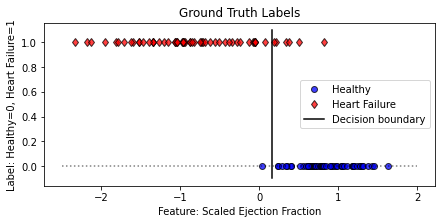

In [2]:
# extract weights
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

# calculate decision boundary - note it is a scalar
decision_boundary = -w0/w1
print('Decision boundary is ', round(decision_boundary,2))

# plot the data
plotData(X,y,adjust_axis=False)

# plot the decision boundary
plt.plot([decision_boundary,decision_boundary],[-0.1,1.1], 'k', label = 'Decision boundary')
_=plt.legend()
plt.title('Ground Truth Labels')

Text(0.5, 1.0, 'Predicted Labels')

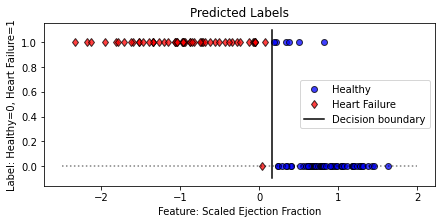

In [4]:
# plot the data
plotDataPred(X,y,model.predict(X),adjust_axis=False)

# plot the decision boundary
plt.plot([decision_boundary,decision_boundary],[-0.1,1.1], 'k', label = 'Decision boundary')
_=plt.legend()
plt.title('Predicted Labels')

### Decision function: 2D features

In [5]:
X = scaler.fit_transform(data[:,:2]) # 2D features
print('Feature matrix X dimensions: ', X.shape)

# Fit the model
model.fit(X,y)

Feature matrix X dimensions:  (120, 2)


LogisticRegression()

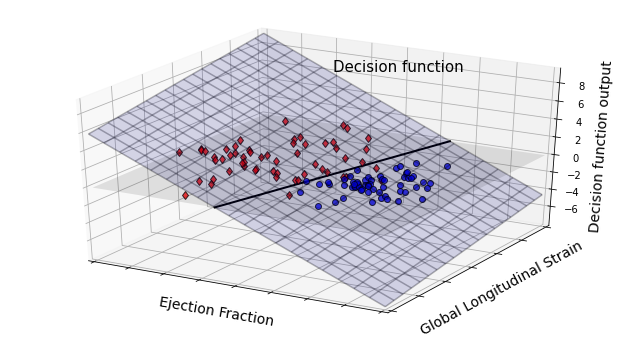

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[-2, 2], x2_lim=[-3, 3]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    #boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    boundary_x1s = -x2s*(w[1]/w[0])-b/w[0]
    #margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    #margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="k", alpha=0.1, cstride=100, rstride=100)
    ax.plot(boundary_x1s, x2s, 0, "k-", linewidth=2, label=r"Decision boundary")
    #ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    #ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "rd", alpha=0.75,markeredgecolor='k',label = 'Heart Failure')
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot_surface(x1, x2, df, alpha=0.15, color="b")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bo", alpha=0.75,markeredgecolor='k',label = 'Healthy')
    ax.axis(x1_lim + x2_lim)
    ax.text(-1, 3, 6, "Decision function", fontsize=15)
    #ax.text(1, 3, 0, "$h=0$", fontsize=15)
    ax.set_xlabel(r"Ejection Fraction", fontsize=14)
    ax.set_ylabel(r"Global Longitudinal Strain", fontsize=14)
    ax.set_zlabel(r"Decision function output", fontsize=14)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #ax.legend(loc="upper right", fontsize=12)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=model.coef_[0], b=model.intercept_[0])

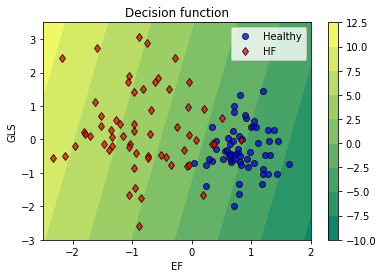

In [7]:
def PlotData2(X,y):
    # plot class 0
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,markeredgecolor='k',label = 'Healthy')
    # plot class 1
    plt.plot(X[y==1,0],X[y==1,1],'rd',alpha=0.75,markeredgecolor='k',label = 'HF')
    
    # annotate the plot
    plt.title('Diagnosis of Heart Failure')
    plt.xlabel('EF')
    plt.ylabel('GLS')
    plt.legend()


def PlotDecisionFunction(model,X,y):

    # Create an 1D array of samples for each feature
    x1 = np.linspace(-2.5, 2, 1000) 
    x2 = np.linspace(-3, 3.5, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2) 
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 

    # Predict labels for the whole feature space    
    y_pred = model.decision_function(Feature_space)
    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')
    
    # Plot data
    PlotData2(X,y)
    
PlotDecisionFunction(model,X,y)
plt.title('Decision function')
plt.colorbar()

### Decision boundary: 2D features

Text(0.5, 1.0, 'Decision boundary')

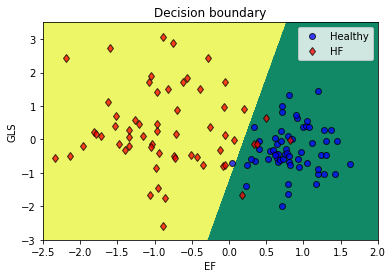

In [8]:
def PlotClassification(model,X,y):

    # Create an 1D array of samples for each feature
    x1 = np.linspace(-2.5, 2, 1000) 
    x2 = np.linspace(-3, 3.5, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2) 
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()] 

    # Predict labels for the whole feature space    
    y_pred = model.predict(Feature_space)
    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')
    
    # Plot data
    PlotData2(X,y)
    
PlotClassification(model,X,y)
plt.title('Decision boundary')